Go to this link: https://www.kaggle.com/competitions/DontGetKicked/data.  

Use the 'training.csv' dataset and read the 'Carvana_Data_Dictionary.txt' for metadata.You can use the below snippet of code to read the training dataset. After reading the raw training dataset into a DataFrame, it should have 72,983 rows and 34 columns.

In [1]:
pip install scorecardbundle

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import kurtosis, skew
from scorecardbundle.feature_discretization import ChiMerge as cm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

In [3]:
#pip install scorecardbundle

In [4]:
df = pd.read_csv('/kaggle/input/DontGetKicked/training.csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


To perform a comprehensive Exploratory Data Analysis (EDA), follow these steps to thoroughly understand and analyze the data.  
1. Review the 'Carvana_Data_Dictionary.txt' to understand the meaning of each column. Use `df.info()` to inspect the data types.
2. Perform Exploratory Data Analysis (EDA) using `ydata_profiling` on the training dataset.
3. Conduct a thorough analysis for deeper insights into the data:
   - Check the minimum and maximum values of continuous fields to identify any out-of-range values.
   - Examine categorical fields for inconsistent or unexpected categories.
   - Analyze the distribution of continuous fields to detect potential outliers.
   - Identify missing values in both categorical and continuous fields.
   - Assess the normality of continuous fields.
   - Review the distribution of categorical fields to spot rare categories (e.g., less than 1% in large datasets) or target imbalance.
   - Compare the distribution of fields separated by target field classes.
   - Evaluate the correlations between continuous fields using a heatmap to          visualize correlation values with chatGPT. 
4. Create a checklist for data cleaning and preparation based on the findings from univariate and multivariate assessments.


In [5]:
df.shape

(72983, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

**Note:** If you encounter an error related to 'numba' while running ydata_profiling, try the following command:

In [7]:
#!pip install --upgrade numba pandas visions ydata_profiling

In [8]:
#profile = ProfileReport(df, title="Car purchased at the Auction data EDA", type_schema = {"Auction": "categorical",
 #                                                                                         "Default": "categorical",
  #                                                                                        "Make": "categorical",
   #                                                                                       "Model": "categorical",
    #                                                                                      "Trim": "categorical",
     #                                                                                     "Submodel": "categorical",
      #                                                                                    "Color": "categorical",
       #                                                                                   "Transmission": "categorical",
        #                                                                                  "WheelType": "categorical",
         #                                                                                "Nationality": "categorical",
          #                                                                               "Size": "categorical",
           #                                                                              "TopThreeAmericanName": "categorical",
            #                                                                              "PRIMEUNIT": "categorical",
             #                                                                             "AUCGUART": "categorical",
              #                                                                            "VNST": "categorical"})
#
#profile.to_file("your_dataset_profile_report.html")

In [9]:
Filtered_df = df.copy()

In [10]:
Filtered_df.drop(columns=['PurchDate','VehYear','Model','Trim','SubModel','WheelTypeID','BYRNO','VNZIP1','VNST'], inplace=True)
Filtered_df.head()

,RefId,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,...,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,7100.0,0,1113
1,2,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,...,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,7600.0,0,1053
2,3,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,...,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,4900.0,0,1389
3,4,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,...,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,4100.0,0,630
4,5,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,...,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,4000.0,0,1020


In [11]:
Filtered_df .set_index('RefId', inplace=True)
Filtered_df.head()

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
RefId,,,,,,,,,,,,,,,,,,,,,
1,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,...,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,7100.0,0,1113
2,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,...,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,7600.0,0,1053
3,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,...,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,4900.0,0,1389
4,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,...,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,4100.0,0,630
5,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,...,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,4000.0,0,1020


In [12]:
column_ranges = {
    'VehicleAge': (0, 30),
    'VehOdo': (0, 120000),
    'MMRAcquisitionAuctionAveragePrice': (800, 46000),
    'MMRAcquisitionAuctionCleanPrice': (1000, 46000),
    'MMRAcquisitionRetailAveragePrice': (1000, 46000),
    'MMRAcquisitonRetailCleanPrice': (1000, 46000),
    'MMRCurrentAuctionAveragePrice': (300, 46000),
    'MMRCurrentAuctionCleanPrice': (400,46000),
    'MMRCurrentRetailAveragePrice': (800,46000),
    'MMRCurrentRetailCleanPrice': (1000,46000),
    'VehBCost': (1000,46000),
    'WarrantyCost': (400,8000)
      
}

for column, (min_val, max_val) in column_ranges.items():
    Filtered_df[column] = Filtered_df[column].apply(lambda x: x if min_val <= x <= max_val else None)

print(Filtered_df)
Filtered_df.describe()
Filtered_df.info()

       IsBadBuy Auction  VehicleAge       Make   Color Transmission WheelType  \
RefId                                                                           
1             0   ADESA           3      MAZDA     RED         AUTO     Alloy   
2             0   ADESA           5      DODGE   WHITE         AUTO     Alloy   
3             0   ADESA           4      DODGE  MAROON         AUTO    Covers   
4             0   ADESA           5      DODGE  SILVER         AUTO     Alloy   
5             0   ADESA           4       FORD  SILVER       MANUAL    Covers   
...         ...     ...         ...        ...     ...          ...       ...   
73010         1   ADESA           8    MERCURY   BLACK         AUTO     Alloy   
73011         0   ADESA           2  CHEVROLET  SILVER         AUTO       NaN   
73012         0   ADESA           4       JEEP  SILVER         AUTO     Alloy   
73013         0   ADESA           3  CHEVROLET   WHITE         AUTO     Alloy   
73014         0   ADESA     

In [13]:
def frequency_table(variable):
    
    unique_elements, counts = np.unique(variable.dropna(), return_counts=True)

    percentages = (counts / len(variable)) * 100

    value_counts_and_percentages = zip(unique_elements, counts, percentages)

    for i, j, k in value_counts_and_percentages:
        print(f"{i}: Count: {j}, Percentage: {k:.2f}%")
    return


frequency_table(Filtered_df['IsBadBuy'])

0: Count: 64007, Percentage: 87.70%
1: Count: 8976, Percentage: 12.30%


In [14]:
y = Filtered_df.iloc[:,0]
X = Filtered_df.drop(Filtered_df.columns[0],axis=1)
X_train,y_train, X_test, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [15]:
Inputs = X_train

columns = Inputs.columns

categorical_indices = [i for i , col in enumerate(Inputs.columns) if Inputs[col].dtype=='object']

categorical_fields = [columns[i] for i in categorical_indices]

continuous_fields = [j for j in columns if j not in categorical_fields]

In [16]:
Filtered_df['Color'] = Filtered_df['Color'].replace('NOT AVAIL', np.nan)

In [17]:
for col in ['Color', 'Make']:
    freq = Filtered_df[col].value_counts(normalize=True)  
    rare_classes = freq[freq < 0.01].index        
    Filtered_df[col] = Filtered_df[col].apply(lambda x: 'Other' if x in rare_classes else x)

In [18]:
min_cv = 0.1

cv_values = Inputs[continuous_fields].std() / Inputs[continuous_fields].mean()

selected_columns =  cv_values[cv_values < 0.1].index

filtered_con = Inputs[selected_columns]

Inputs_con = Inputs[continuous_fields].drop(selected_columns, axis=1)
Inputs_con.shape

(58386, 13)

In [19]:
threshold = 99

mode_category = (Inputs[categorical_fields].apply(lambda x: x.value_counts().max() / len(x)) * 100)

selected_categorical_columns = mode_category[mode_category > threshold].index

mode_filtered_inputs = Inputs[selected_categorical_columns]

Inputs_cat = Inputs[categorical_fields].drop(selected_categorical_columns, axis=1)
Inputs_cat.shape

(58386, 10)

In [20]:
threshold = 90

distinct_percentage = (Inputs_cat.apply(lambda x: x.dropna().nunique() / x.count()) * 100)

selected_categorical_columns = distinct_percentage[distinct_percentage > threshold].index

distinct_filtered_inputs = Inputs_cat[selected_categorical_columns]

Inputs_cat = Inputs_cat.drop(selected_categorical_columns, axis=1)
Inputs_cat.shape

(58386, 10)

In [21]:
primeunit_data = Filtered_df[['PRIMEUNIT', 'IsBadBuy']].dropna()

contingency_primeunit = pd.crosstab(primeunit_data['PRIMEUNIT'], primeunit_data['IsBadBuy'])

row_percentages_pu = contingency_primeunit.div(contingency_primeunit.sum(axis=1), axis=0) * 100


chi2, p, dof, expected_pu = chi2_contingency(contingency_primeunit)

percentage_low_expected_PRIMEUNIT = (expected_pu < 5).sum().sum() / (expected_pu.shape[0] * expected_pu.shape[1]) * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected_PRIMEUNIT:.2f}%")


odds_ratio, p_value = fisher_exact(contingency_primeunit)

print(f"Odds ratio: {odds_ratio}")
print(f"P-value: {p_value}")

if p_value < 0.05:
   print("There is a significant difference in 'PRIMEUNIT' among the 'IsBadBuy' groups.")
else:
   print("There is no significant difference in 'PRIMEUNIT' among the 'IsBadBuy' groups.")

Percentage of cells with expected counts less than 5: 25.00%
Odds ratio: 2.7249718785151855
P-value: 0.031913695820739094
There is a significant difference in 'PRIMEUNIT' among the 'IsBadBuy' groups.


In [22]:
aucguart_data = Filtered_df[['AUCGUART', 'IsBadBuy']].dropna()

contingency_aucguart = pd.crosstab(aucguart_data['AUCGUART'], aucguart_data['IsBadBuy'])
row_percentages_au = contingency_aucguart.div(contingency_aucguart.sum(axis=1), axis=0) * 100

chi2_au, p_value, dof_au, expected_au = chi2_contingency(contingency_aucguart)

percentage_low_expected_AUCGUART = (expected_au < 5).sum().sum() / (expected_au.shape[0] * expected_au.shape[1]) * 100

print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected_AUCGUART:.2f}%")

odds_ratio, p_value = fisher_exact(contingency_aucguart)

print(f"Odds ratio: {odds_ratio}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in 'AUCGUART' among the 'IsBadBuy' groups.")
else:
    print("There is no significant difference in 'AUCGUART' among the 'IsBadBuy' groups.")

Percentage of cells with expected counts less than 5: 25.00%
Odds ratio: 2.8980281690140846
P-value: 0.01080463484600896
There is a significant difference in 'AUCGUART' among the 'IsBadBuy' groups.


In [23]:
Filtered_df['PRIMEUNIT'] = Filtered_df['PRIMEUNIT'].fillna('unknown')
Filtered_df['AUCGUART'] = Filtered_df['AUCGUART'].fillna('unknown')

In [24]:
Filtered_df.to_csv('/kaggle/working/Auction_Car.csv')

In [25]:
Cleaning_df=Filtered_df.copy()

In [26]:
Target_Cleaning = Cleaning_df.iloc[:,0]
Inputs_Cleaning = Cleaning_df.drop(Cleaning_df.columns[0],axis=1)

In [27]:
columns_Cleaning = Inputs_Cleaning.columns

categorical_indices_Cleaning = [i for i , col in enumerate(Inputs_Cleaning.columns) if Inputs_Cleaning[col].dtype=='object']

categorical_fields_Cleaning = [columns_Cleaning[i] for i in categorical_indices_Cleaning]

continuous_fields_Cleaning = [j for j in columns_Cleaning if j not in categorical_fields_Cleaning]

In [28]:
categorical_fields_Cleaning

['Auction',
 'Make',
 'Color',
 'Transmission',
 'WheelType',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'PRIMEUNIT',
 'AUCGUART']

In [29]:
Inputs_iso = Inputs_Cleaning.copy()

Inputs_iso = Inputs_iso.dropna()

scaler = StandardScaler()
Inputs_iso[continuous_fields_Cleaning] = scaler.fit_transform(Inputs_iso[continuous_fields_Cleaning])

label_encoder = LabelEncoder()
Inputs_iso[categorical_fields_Cleaning] = Inputs_iso[categorical_fields_Cleaning].apply(label_encoder.fit_transform)

clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(Inputs_iso)

outliers = clf.predict(Inputs_iso)

Inputs_iso['outlier'] = outliers

percentage_outliers = (outliers[outliers == -1].shape[0] / len(outliers)) * 100
print(f"Percentage of outliers: {percentage_outliers:.2f}%")

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Percentage of outliers: 1.00%


In [30]:
y_train_Cleaning = Target_Cleaning
outlier_index = Inputs_iso[Inputs_iso['outlier'] == -1].index
Inputs_outprep = Inputs_Cleaning.drop(outlier_index)
y_train_outprep = y_train_Cleaning.drop(outlier_index)

train_outprep = pd.concat([Inputs_outprep, y_train_outprep], axis=1)

In [31]:
train_outprep['Num_Missing_Values'] = train_outprep.isnull().sum(axis=1)

rows_with_missing_values = train_outprep[train_outprep['Num_Missing_Values'] > 0]

total_rows = len(train_outprep)
rows_with_missing_count = len(rows_with_missing_values)
percentage_rows_with_missing = (rows_with_missing_count / total_rows) * 100

print("Report on Rows with Missing Values:")
print(f"Total Rows: {total_rows}")
print(f"Rows with Missing Values: {rows_with_missing_count} ({percentage_rows_with_missing:.2f}%)")


print("\nDataFrame with Num_Missing_Values column:")
print(train_outprep.sort_values(by='Num_Missing_Values', ascending = False))

Report on Rows with Missing Values:
Total Rows: 72297
Rows with Missing Values: 4386 (6.07%)

DataFrame with Num_Missing_Values column:
       Auction  VehicleAge       Make   Color Transmission WheelType  VehOdo  \
RefId                                                                          
10897  MANHEIM           7      Other   WHITE         AUTO    Covers   78288   
38009  MANHEIM           3    HYUNDAI  SILVER         AUTO    Covers   45047   
14446    OTHER           3    PONTIAC   WHITE         AUTO       NaN   78121   
44973    OTHER           4  CHEVROLET    GREY         AUTO       NaN   68508   
12681    OTHER           6       FORD    GOLD         AUTO       NaN   66705   
...        ...         ...        ...     ...          ...       ...     ...   
25156    OTHER           4      DODGE  MAROON         AUTO    Covers   61163   
25157    OTHER           5       JEEP    BLUE         AUTO     Alloy   83131   
25158    OTHER           6  CHEVROLET  SILVER         AUTO    Co

In [32]:
train_outprep.columns

Index(['Auction', 'VehicleAge', 'Make', 'Color', 'Transmission', 'WheelType',
       'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'IsBadBuy', 'Num_Missing_Values'],
      dtype='object')

In [33]:
columns_price = [
    'MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice',
    'MMRCurrentAuctionAveragePrice' ,
    'MMRCurrentAuctionCleanPrice' ,
    'MMRCurrentRetailAveragePrice' , 
    'MMRCurrentRetailCleanPrice'
]

train_outprep_price_clean = train_outprep.dropna(subset=columns_price)

max_missing_values_threshold = 4

missing_counts = train_outprep_price_clean[columns_price].isna().sum(axis=1)

train_outprep =  train_outprep_price_clean[missing_counts <= max_missing_values_threshold]

In [34]:
missing_values_report = pd.DataFrame({
    'Column': train_outprep.columns,
    'Missing Values': train_outprep.isnull().sum().values,
    'Percentage Missing': train_outprep.isnull().mean().values * 100
})

print("Missing Values Report:")
print(missing_values_report)

Missing Values Report:
                               Column  Missing Values  Percentage Missing
0                             Auction               0            0.000000
1                          VehicleAge               0            0.000000
2                                Make               0            0.000000
3                               Color              97            0.136406
4                        Transmission               9            0.012656
5                           WheelType            3138            4.412819
6                              VehOdo               0            0.000000
7                         Nationality               1            0.001406
8                                Size               1            0.001406
9                TopThreeAmericanName               1            0.001406
10  MMRAcquisitionAuctionAveragePrice               0            0.000000
11    MMRAcquisitionAuctionCleanPrice               0            0.000000
12   MMRAcquisi

In [35]:
train_outprep_no_missing_fix = train_outprep.copy()

Con_Vars = ['VehBCost']
Cat_Vars = ['Color','Size','Transmission','WheelType','Nationality','TopThreeAmericanName']

Con_imputer = SimpleImputer(strategy='median') 
Cat_imputer = SimpleImputer(strategy='most_frequent')   
                                                     

train_outprep_no_missing_fix[Con_Vars] = Con_imputer.fit_transform(train_outprep_no_missing_fix[Con_Vars])

train_outprep_no_missing_fix[Cat_Vars] = Cat_imputer.fit_transform(train_outprep_no_missing_fix[Cat_Vars])

print("DataFrame after Imputation:")
print(train_outprep_no_missing_fix)

train_outprep_no_missing_fix.info()

DataFrame after Imputation:
      Auction  VehicleAge       Make   Color Transmission WheelType  VehOdo  \
RefId                                                                         
1       ADESA           3      MAZDA     RED         AUTO     Alloy   89046   
2       ADESA           5      DODGE   WHITE         AUTO     Alloy   93593   
3       ADESA           4      DODGE  MAROON         AUTO    Covers   73807   
4       ADESA           5      DODGE  SILVER         AUTO     Alloy   65617   
5       ADESA           4       FORD  SILVER       MANUAL    Covers   69367   
...       ...         ...        ...     ...          ...       ...     ...   
73010   ADESA           8    MERCURY   BLACK         AUTO     Alloy   45234   
73011   ADESA           2  CHEVROLET  SILVER         AUTO     Alloy   71759   
73012   ADESA           4       JEEP  SILVER         AUTO     Alloy   88500   
73013   ADESA           3  CHEVROLET   WHITE         AUTO     Alloy   79554   
73014   ADESA           

In [36]:
missing_values_report_ = pd.DataFrame({
    'Column': train_outprep_no_missing_fix.columns,
    'Missing Values': train_outprep_no_missing_fix.isnull().sum().values,
    'Percentage Missing': train_outprep_no_missing_fix.isnull().mean().values * 100
})

print("Missing Values Report:")
print(missing_values_report_)

Missing Values Report:
                               Column  Missing Values  Percentage Missing
0                             Auction               0                 0.0
1                          VehicleAge               0                 0.0
2                                Make               0                 0.0
3                               Color               0                 0.0
4                        Transmission               0                 0.0
5                           WheelType               0                 0.0
6                              VehOdo               0                 0.0
7                         Nationality               0                 0.0
8                                Size               0                 0.0
9                TopThreeAmericanName               0                 0.0
10  MMRAcquisitionAuctionAveragePrice               0                 0.0
11    MMRAcquisitionAuctionCleanPrice               0                 0.0
12   MMRAcquisi

In [37]:
train_outprep_no_missing_fix = train_outprep_no_missing_fix.drop(columns=['Num_Missing_Values'])

In [38]:
train_outprep_no_missing_fix.to_csv('/kaggle/working/df_train_car.csv')

In [39]:
train_FS = pd.read_csv('/kaggle/working/df_train_car.csv')
train_FS.head()

,RefId,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
0,1,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,...,7451.0,8552.0,11597.0,12409.0,unknown,unknown,7100.0,0,1113,0
1,2,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,...,7456.0,9222.0,11374.0,12791.0,unknown,unknown,7600.0,0,1053,0
2,3,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,...,4035.0,5557.0,7146.0,8702.0,unknown,unknown,4900.0,0,1389,0
3,4,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,...,1844.0,2646.0,4375.0,5518.0,unknown,unknown,4100.0,0,630,0
4,5,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,...,3247.0,4384.0,6739.0,7911.0,unknown,unknown,4000.0,0,1020,0


In [40]:
train_FS.set_index('RefId', inplace=True)
train_FS.shape

(71111, 24)

In [41]:
Desc_Stats = train_FS.describe()

continuous_columns_ = train_FS.select_dtypes(include=['float64', 'int64']).columns

skewness_values = {}
kurtosis_values = {}

for column in continuous_columns_:
    skewness_values[column] = skew(train_FS[column])
    kurtosis_values[column] = kurtosis(train_FS[column])
    
skew_kurt_stats = pd.DataFrame({
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})


print(Desc_Stats)  
print(skew_kurt_stats) 

         VehicleAge         VehOdo  MMRAcquisitionAuctionAveragePrice  \
count  71111.000000   71111.000000                       71111.000000   
mean       4.187496   71467.091927                        6147.683157   
std        1.706322   14534.711434                        2287.094504   
min        0.000000    4825.000000                         884.000000   
25%        3.000000   61828.000000                        4332.000000   
50%        4.000000   73310.000000                        6116.000000   
75%        5.000000   82361.500000                        7745.000000   
max        9.000000  115717.000000                       33543.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     71111.000000                      71111.000000   
mean                       7402.776082                       8536.932486   
std                        2511.513144                       2940.291579   
min                        1076.000000

In [42]:
chi_merge_list = ['VehBCost', 'WarrantyCost']

trans_cm = cm.ChiMerge(max_intervals=5, min_intervals=1, decimal=3,output_dataframe=True)
result_cm = trans_cm.fit_transform(train_FS[chi_merge_list], train_FS['IsBadBuy'].astype('int')) 
trans_cm.boundaries_

boundaries_dict = {key: np.insert(boundaries, 0, -np.inf) for key, boundaries in trans_cm.boundaries_.items()}

for key, boundaries in boundaries_dict.items():
    column_name = f"{key}_cat_cm"
    train_FS[column_name] = pd.cut(train_FS[key], bins=boundaries, labels=False, right=False)
    
    print(f'{column_name} bin edges:', boundaries)
    
    frequency_table(train_FS[column_name])
    print("\n")

train_FS = train_FS.drop(columns=['VehBCost', 'WarrantyCost'])

train_FS.describe()

VehBCost_cat_cm bin edges: [ -inf 4030. 4675. 5490. 6380.   inf]
0: Count: 3551, Percentage: 4.99%
1: Count: 5621, Percentage: 7.90%
2: Count: 9306, Percentage: 13.09%
3: Count: 12808, Percentage: 18.01%
4: Count: 39825, Percentage: 56.00%


WarrantyCost_cat_cm bin edges: [ -inf 1633. 1689. 1703. 2152.   inf]
0: Count: 54492, Percentage: 76.63%
1: Count: 1399, Percentage: 1.97%
2: Count: 291, Percentage: 0.41%
3: Count: 9163, Percentage: 12.89%
4: Count: 5766, Percentage: 8.11%




,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,IsOnlineSale,IsBadBuy,VehBCost_cat_cm,WarrantyCost_cat_cm
count,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000,71111.000000
mean,4.187496,71467.091927,6147.683157,7402.776082,8536.932486,9903.245546,6120.854439,7382.747901,8770.926861,10145.625276,0.024792,0.123005,3.121275,0.738761
std,1.706322,14534.711434,2287.094504,2511.513144,2940.291579,3126.974768,2289.818064,2513.777553,2917.992742,3106.253830,0.155492,0.328445,1.200760,1.395474
min,0.000000,4825.000000,884.000000,1076.000000,1455.000000,1662.000000,369.000000,494.000000,899.000000,1034.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,61828.000000,4332.000000,5473.000000,6361.000000,7557.000000,4304.500000,5449.000000,6570.000000,7826.000000,0.000000,0.000000,2.000000,0.000000
50%,4.000000,73310.000000,6116.000000,7329.000000,8467.000000,9820.000000,6063.000000,7313.000000,8725.000000,10102.000000,0.000000,0.000000,4.000000,0.000000
75%,5.000000,82361.500000,7745.000000,9004.000000,10631.000000,12070.000000,7717.000000,8988.000000,10866.000000,12290.000000,0.000000,0.000000,4.000000,0.000000
max,9.000000,115717.000000,33543.000000,36701.000000,36726.000000,40137.000000,33369.000000,36478.000000,36539.000000,39896.000000,1.000000,1.000000,4.000000,4.000000


In [43]:
train_FS.shape

(71111, 24)

In [44]:
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

nominal_fields = ["Auction", "Make", "Color", "Transmission", "WheelType", "Nationality", "Size","TopThreeAmericanName"]

one_hot_encoded = one_hot_encoder.fit_transform(train_FS[nominal_fields])

one_hot_encoded_FS = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_fields))

train_FS_ = train_FS.drop(columns=nominal_fields)

encoded_FS = pd.concat([train_FS_.reset_index(drop=True), one_hot_encoded_FS.reset_index(drop=True)], axis=1)

encoded_FS.shape

(71111, 64)

In [45]:
encoded_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71111 entries, 0 to 71110
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VehicleAge                         71111 non-null  int64  
 1   VehOdo                             71111 non-null  int64  
 2   MMRAcquisitionAuctionAveragePrice  71111 non-null  float64
 3   MMRAcquisitionAuctionCleanPrice    71111 non-null  float64
 4   MMRAcquisitionRetailAveragePrice   71111 non-null  float64
 5   MMRAcquisitonRetailCleanPrice      71111 non-null  float64
 6   MMRCurrentAuctionAveragePrice      71111 non-null  float64
 7   MMRCurrentAuctionCleanPrice        71111 non-null  float64
 8   MMRCurrentRetailAveragePrice       71111 non-null  float64
 9   MMRCurrentRetailCleanPrice         71111 non-null  float64
 10  PRIMEUNIT                          71111 non-null  object 
 11  AUCGUART                           71111 non-null  obj

In [46]:
selected_features_FS = [col for col in encoded_FS.columns if col not in ['IsBadBuy', 'PRIMEUNIT', 'AUCGUART']]


scaling_methods = ['min-max'] 


for feature in selected_features_FS:

        min_max_scaler = MinMaxScaler()
        encoded_FS[feature] = min_max_scaler.fit_transform(encoded_FS[[feature]])


encoded_FS.shape

(71111, 64)

In [47]:
encoded_FS.to_csv('/kaggle/working/df_train_fs.csv')

In [48]:
train_FE = pd.read_csv('/kaggle/working/df_train_car.csv')
train_FE.head()

,RefId,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
0,1,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,...,7451.0,8552.0,11597.0,12409.0,unknown,unknown,7100.0,0,1113,0
1,2,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,...,7456.0,9222.0,11374.0,12791.0,unknown,unknown,7600.0,0,1053,0
2,3,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,...,4035.0,5557.0,7146.0,8702.0,unknown,unknown,4900.0,0,1389,0
3,4,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,...,1844.0,2646.0,4375.0,5518.0,unknown,unknown,4100.0,0,630,0
4,5,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,...,3247.0,4384.0,6739.0,7911.0,unknown,unknown,4000.0,0,1020,0


In [49]:
train_FE.set_index('RefId', inplace=True)
train_FE.shape

(71111, 24)

Lambda for VehBCost: 0.5898608157722153


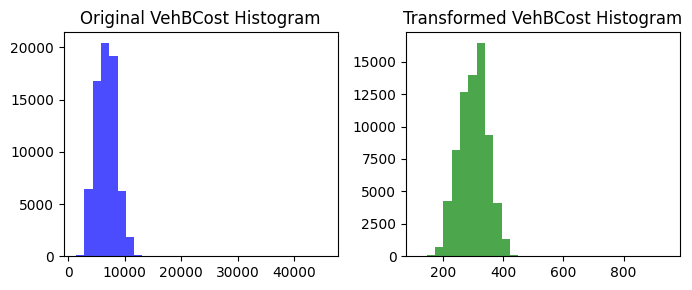

Lambda for WarrantyCost: -0.07014997443909862


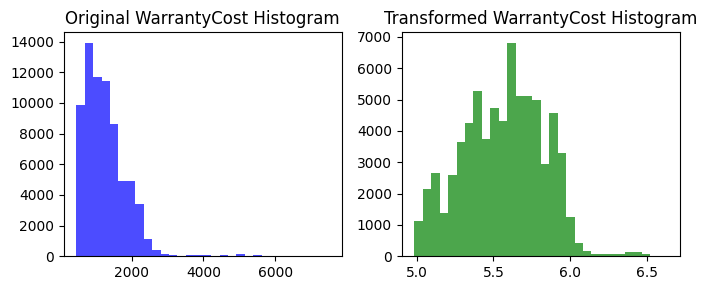



      Auction  VehicleAge       Make   Color Transmission WheelType  VehOdo  \
RefId                                                                         
1       ADESA           3      MAZDA     RED         AUTO     Alloy   89046   
2       ADESA           5      DODGE   WHITE         AUTO     Alloy   93593   
3       ADESA           4      DODGE  MAROON         AUTO    Covers   73807   
4       ADESA           5      DODGE  SILVER         AUTO     Alloy   65617   
5       ADESA           4       FORD  SILVER       MANUAL    Covers   69367   
...       ...         ...        ...     ...          ...       ...     ...   
73010   ADESA           8    MERCURY   BLACK         AUTO     Alloy   45234   
73011   ADESA           2  CHEVROLET  SILVER         AUTO     Alloy   71759   
73012   ADESA           4       JEEP  SILVER         AUTO     Alloy   88500   
73013   ADESA           3  CHEVROLET   WHITE         AUTO     Alloy   79554   
73014   ADESA           3      MAZDA  SILVER      

In [50]:
selected_features_FE = ['VehBCost', 'WarrantyCost']

for feature in selected_features_FE:

    transformer = PowerTransformer(method='box-cox', standardize=False)

    train_FE[f"{feature}_transformed"] = transformer.fit_transform(train_FE[[feature]])

    lambda_value = transformer.lambdas_[0]
    print(f"Lambda for {feature}: {lambda_value}")
    
    plt.figure(figsize=(7, 3))

    plt.subplot(1, 2, 1)
    plt.hist(train_FE[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f'Original {feature} Histogram')

    plt.subplot(1, 2, 2)
    plt.hist(train_FE[f"{feature}_transformed"], bins=30, color='green', alpha=0.7)
    plt.title(f'Transformed {feature} Histogram')

    plt.tight_layout()
    plt.show()

train_FE = train_FE.drop(columns=['VehBCost', 'WarrantyCost'])

print('\n')
print(train_FE)

In [51]:
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

nominal_fields = ["Auction", "Make", "Color", "Transmission", "WheelType", "Nationality", "Size","TopThreeAmericanName"]

one_hot_encoded_FE = one_hot_encoder.fit_transform(train_FE[nominal_fields])

one_hot_encoded_FE = pd.DataFrame(one_hot_encoded_FE, columns=one_hot_encoder.get_feature_names_out(nominal_fields))

train_FE_ = train_FE.drop(columns=nominal_fields)

encoded_FE = pd.concat([train_FE_.reset_index(drop=True), one_hot_encoded_FE.reset_index(drop=True)], axis=1)
encoded_FE.shape

(71111, 64)

In [52]:
selected_features_FE = [col for col in encoded_FE.columns if col not in ['IsBadBuy', 'PRIMEUNIT', 'AUCGUART']]


scaling_methods = ['z-score'] 


for feature in selected_features_FE:

        z_score_scaler = StandardScaler()
        encoded_FE[feature] = z_score_scaler.fit_transform(encoded_FE[[feature]])

encoded_FE.shape

(71111, 64)

In [53]:
encoded_FE.to_csv('/kaggle/working/encoded_FE.csv')